# Урок 3
## Описательная статистика. Качественные и количественные характеристики популяции. Графическое представление данных

In [340]:
import numpy as np
import pandas as pd

from math import sqrt

### Задача 1

`Даны значения зарплат из выборки выпускников:`

`100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150`

`Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек numpy, pandas и др.) посчитать среднее арифметическое, смещённую и несмещённую оценки дисперсии, среднее квадратичное отклонение для данной выборки.`

`Можно затем посчитать те же значения с использованием библиотек, чтобы проверить себя.`

### Функция среднего значения

Пусть дана выборка $X = (x_1, x_2, \dots, x_n)$ из значений одномерной случайной величины. Одной из наиболее естественных статистик таких выборок является __среднее арифметическое__ (или __выборочное среднее__). Оно обозначается как $\overline{X}$:
$$\overline{X} = \dfrac{1}{n} \displaystyle\sum_{i = 1}^n x_i$$

Выборочное среднее является __оценкой__ для математического ожидания. Это означает, что, как правило, чем больше элементов в выборке, тем ближе выборочное среднее этой выборки к математическому ожиданию соответствующей случайной величины.

In [2]:
def my_mean(number: list) -> float:
    return sum(number) / len(number)

**Создандим требуемый список**

In [17]:
numbers = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150])

In [18]:
# Среднее арифметическое значение
my_mean(numbers)

73.14285714285714

**Проверка**

In [19]:
# Среднее арифметическое значение
numbers.mean()

73.14285714285714

### Функция рассчёта дисперсии

__Выборчная дисперсия__, как следует из названия, оценивает дисперсию случайной величины:
$$\sigma_X^2 = \dfrac{1}{n} \displaystyle\sum_{i = 1}^n \left( x_i - \overline{X} \right)^2$$

In [20]:
def dispersion(number:list, mxture=0) -> float:
    result = [(i - my_mean(number)) ** 2 for i in number]
    return sum(result) / (len(number) - mxture)

In [21]:
# Не смещеённая оценка дисперсии
print(dispersion(numbers))

# Смещённая оценка дисперсии
print(dispersion(numbers, 1))

2135.074829931973
2241.8285714285716


**Проверка**

In [22]:
# Не смещеённая оценка дисперсии
print(numbers.var())

# Смещённая оценка дисперсии
print(numbers.var(ddof=1))

2135.0748299319725
2241.828571428571


### Функция рассчёта среднего квадратичного отклонения

Вообще, дисперсия является не очень наглядной мерой разброса, поскольку имеет другой масштаб. Поэтому часто наряду с дисперсией используют __среднее квадратическое отклонение__, равное корню из дисперсии.

Оценивается среднее квадратическое отклонение аналогично дисперсии. Смещённая и несмещённая оценки:
$$\sigma_X = \sqrt{\dfrac{1}{n} \displaystyle\sum_{i = 1}^n \left( x_i - \overline{X} \right)^2}, \:\:
\sigma_{X, \: unbiased} = \sqrt{\dfrac{1}{n - 1} \displaystyle\sum_{i = 1}^n \left( x_i - \overline{X} \right)^2}$$

Как и в случае с дисперсией, под $\sigma_X$ мы будем в будущем понимать именно _несмещённую_ оценку.

In [9]:
def my_std(number:list, mixture=0) -> float:
    return sqrt(dispersion(number, mixture))

In [10]:
# Среднее квадратичное отклонение не смещённой оценки
print(my_std(numbers))

# Среднее квадратичное отклонение смещённой оценки
print(my_std(numbers, 1))

46.20686994302874
47.34795213553139


**Проверка**

In [23]:
# Среднее квадратичное отклонение не смещённой оценки
print(numbers.std())

# Среднее квадратичное отклонение смещённой оценки
print(numbers.std(ddof=1))

46.206869943028735
47.347952135531386


### Задача 2

`Для выборки из задачи 1 найти (также без использования библиотек):`
1. медиану, первый и третий квартили, интерквартильное расстояние,
2. выборсы в выборке (используя для этого метод как при построении "усов" из boxplot).

`Возможные неоднозначности в вычислении квантилей можно разрешать любым способом.`

### Функция рассчёта медианы

__Медиана__ — такое значение $t$, что половина элементов из выборки меньше, либо равна $t$, и, соответственно, половина больше, либо равна $t$.

Медиана представляет собой _середину_ выборки: если отсортировать элементы выборки по возрастанию, то медиана приходится на середину. 

Медиана может приходиться как на промежуток между элементами выборки, так и на конкретный элемент.

In [38]:
def my_median(number: list):
    number = sorted(number)
    if len(number) % 2:
        return number[len(number) // 2]
    return my_mean(number[len(number) // 2 - 1 : len(number) // 2 + 1])

In [55]:
# Медиана при не чётном количестве элементов
print(my_median(numbers))

# Медиана при чётном количестве элементов
print(my_median(np.append(numbers, [10])))

70
67.5


**Проверка**

In [63]:
# Медиана при не чётном количестве элементов
print(np.median(numbers))

# Медиана при чётном количестве элементов
print(np.median(np.append(numbers, [10])))

70.0
67.5


### Функция рассчёта квартилей

Медиана является частным случаем более общего понятия — _квантиля_. 

Пусть $\alpha \in (0, 1)$. __Квантиль порядка $\alpha$__ — такое число $t_\alpha$, что «$\alpha$ процентов» всех элементов выборки меньше $t_\alpha$ и, соответственно, «$(1 - \alpha)$ процентов» элементов — больше $t_\alpha$.

Как и в случае с медианой, квантиль может как приходиться на один из элементов выборки, так и лежать где-то между ними.

Из определения следует, что медиана является квантилем порядка $0.5$. Кроме того, часто используют:

* __первый квартиль__ — квантиль порядка $0.25$ (т.е. значение, которое не превышают $25 \%$ значений из выборки),
* __второй квартиль__ — то же, что и медиана,
* __третий квартиль__ — квантиль порядка $0.75$.

Также могут встречаться:
* __децили__ — то же, что и квартили, но делим мы не на $4$ части, а на $10$. Например, медиана будет пятым децилем,
* __перцентили__ — это просто другой способ задать квантиль. Здесь мы используем не долю $\alpha \in (0, 1)$, а процент. Например, третий квартиль будет $75$-перцентилем.


In [324]:
def my_quantile(number, q=0.25):
    number = sorted(number)
    n = len(number)
    
    n_left_elements = int(n * q)
    n_right_elements = int(n * (1 - q))
    
    if n_left_elements + n_right_elements == n:
        return (number[n_left_elements + 1] + number[n_left_elements]) / 2
    else:
        assert n_left_elements + n_right_elements == n -1
        return number[n_left_elements]

In [325]:
# Первый квартиль
print(my_quantile(numbers))

# Третий квариль
print(my_quantile(np.append(numbers, [10]), 0.75))

45
84


**Проверка**

In [326]:
# Первый квартиль
print(np.quantile(numbers, 0.25))

# Третий квартиль
print(np.quantile(np.append(numbers, [10]), 0.75))

45.0
83.0


### Интерквартильный размах

__Интерквартильный размах__ — это отрезок между первым и третьим квартилями. Это отрезок, в который попадают $50 \%$ значений выборки.

Интерквартильный размах используется для измерения разброса значений выборки вокруг среднего. Иногда его использование оказывается более предпочтительным, чем использование среднего квадратического отклонения, поскольку не учитывает выбросы в данных.

Например, рассмотрим синтетическую выборку, в которой $1000$ раз встречается значение $1$, и всего однажды появляется значение $10000$. Его выборочное среднее и среднее квадратическое отклонение:

In [329]:
iqr = my_quantile(numbers, 0.75) - my_quantile(numbers)
iqr

39

### Box plot

Другой способ визуализировать одномерные данные — __boxplot__ или __ящик с усами__. В самом ящике отмечены квартили $Q_1$, $Q_2$ (медиана), $Q_3$. «Усы» здесь — границы отрезка
$$\left[ Q_1 - 1.5 \times IQR, \: Q_3 + 1.5 \times IQR \right],$$
где $IQR$ — интерквартильное расстояние.

In [331]:
boxplot = (my_quantile(numbers) - 1.5 * iqr, my_quantile(numbers, 0.75) + 1.5 * iqr)
boxplot

(-13.5, 142.5)

In [335]:
result = [i for i in numbers if i < boxplot[0] or i > boxplot[1]]
result

[230, 150]

**Проверка**

In [342]:
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

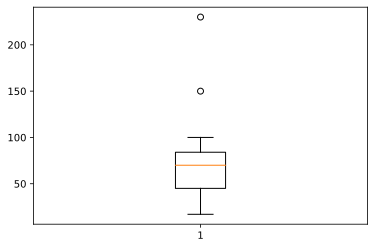

In [346]:
plt.boxplot(numbers)
plt.show()

### Задача 3

`В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. `

`Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?`

`Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.`

Предположим, что на факультет **A** поступило $n$ человек, тогда на факультет **B** тоже поступило $n$ человек, а на факультет **C** поступило $2n$ человек. Всего поступило $N = n + n + 2n = 4n$, тогда вероятность того, что студент поступил на факультеты A и B равна $\frac{n}{4n} = \frac{1}{4}$, а на факультет **C**  $\frac{2n}{4n} = \frac{1}{2}$

$$P(B_A) = P(B_B) = \frac{1}{4}, P(B_C) = \frac{1}{2}$$
Тогда по формуле полной вероятности

$$P(A) = \frac{1}{4} \cdot 0,8 + \frac{1}{4} \cdot 0,7 + \frac{1}{2} \cdot 0,9 = 0,825$$
a) на факультете A

$$P(A|B_A) = \dfrac{0,25 \cdot 0,8}{0,825} = 0,2424$$
б) на факультете B

$$P(A|B_B) = \dfrac{0,25 \cdot 0,7}{0,825} = 0.2121$$
в) на факультете C

$$P(A|B_C) = \dfrac{0,5 \cdot 0,9}{0,825} = 0.5455$$